# Compact Objects

In [1]:
from mayawaves.coalescence import Coalescence
from mayawaves.compactobject import CompactObject
import matplotlib.pyplot as plt

## Create a Coalescence object using the simulation h5 file

In [2]:
example_h5_filepath = "../../../example_simulation/D11_q5_a1_-0.362_-0.0548_-0.64_a2_-0.0013_0.001_-0.0838_m533.33.h5"

In [3]:
coalescence = Coalescence(example_h5_filepath)

## Obtain the CompactObject objects associated with the larger object (primary) and smaller object (secondary)

In [4]:
primary_compact_object = coalescence.primary_compact_object
secondary_compact_object = coalescence.secondary_compact_object

## Obtain trajectory data

In [5]:
time, primary_position = primary_compact_object.position_vector
time, secondary_position = secondary_compact_object.position_vector

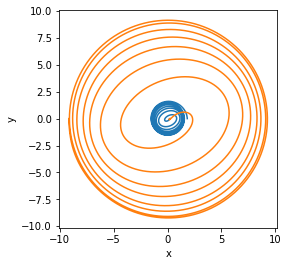

In [6]:
plt.plot(primary_position[:, 0], primary_position[:, 1])
plt.plot(secondary_position[:, 0], secondary_position[:, 1])
plt.gca().set_aspect('equal', adjustable='box')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## Obtain initial data such as masses and spins

In [7]:
print(f"initial dimensionless spin of primary BH: {primary_compact_object.initial_dimensionless_spin}")
print(f"initial dimensionless spin of secondary BH: {secondary_compact_object.initial_dimensionless_spin}")
print(f"initial dimensional spin of primary BH: {primary_compact_object.initial_dimensional_spin}")
print(f"initial dimensional spin of secondary BH: {secondary_compact_object.initial_dimensional_spin}")

initial dimensionless spin of primary BH: [-0.36451101 -0.05518085 -0.64443774]
initial dimensionless spin of secondary BH: [-0.00129516  0.00100747 -0.08374188]
initial dimensional spin of primary BH: [-0.25138458 -0.0380554  -0.4444357 ]
initial dimensional spin of secondary BH: [-3.59770435e-05  2.79857020e-05 -2.32619237e-03]


In [8]:
print(f"initial horizon mass of primary BH: {primary_compact_object.initial_horizon_mass}")
print(f"initial horizon mass of secondary BH: {secondary_compact_object.initial_horizon_mass}")
print(f"initial irreducible mass of primary BH: {primary_compact_object.initial_irreducible_mass}")
print(f"initial irreducible mass of secondary BH: {secondary_compact_object.initial_irreducible_mass}")

initial horizon mass of primary BH: 0.8304509510300787
initial horizon mass of secondary BH: 0.16666770757317356
initial irreducible mass of primary BH: 0.7588330514
initial irreducible mass of secondary BH: 0.166521231


## Obtain timeseries data for parameters such as spin
### Note that for many systems, the initial horizons are tracked all the way through merger after which the values are no longer reliable.

In [9]:
time, primary_spin = primary_compact_object.dimensionless_spin_vector

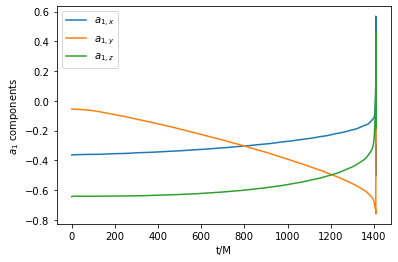

In [10]:
plt.plot(time, primary_spin[:, 0], label=r'$a_{1, x}$')
plt.plot(time, primary_spin[:, 1], label=r'$a_{1, y}$')
plt.plot(time, primary_spin[:, 2], label=r'$a_{1, z}$')
plt.legend()
plt.xlabel('t/M')
plt.ylabel(f'$a_{1}$ components')
plt.show()

In [11]:
time, secondary_spin = secondary_compact_object.dimensionless_spin_vector

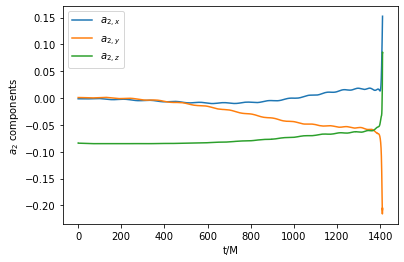

In [12]:
plt.plot(time, secondary_spin[:, 0], label=r'$a_{2, x}$')
plt.plot(time, secondary_spin[:, 1], label=r'$a_{2, y}$')
plt.plot(time, secondary_spin[:, 2], label=r'$a_{2, z}$')
plt.legend()
plt.xlabel('t/M')
plt.ylabel(f'$a_{2}$ components')
plt.show()

## You can access any data that is available for the given compact object

In [13]:
available_columns = primary_compact_object.available_data_columns
print(available_columns)

[<Column.ITT: 1>, <Column.TIME: 2>, <Column.X: 3>, <Column.Y: 4>, <Column.Z: 5>, <Column.VX: 6>, <Column.VY: 7>, <Column.VZ: 8>, <Column.AX: 9>, <Column.AY: 10>, <Column.AZ: 11>, <Column.SX: 12>, <Column.SY: 13>, <Column.SZ: 14>, <Column.PX: 15>, <Column.PY: 16>, <Column.PZ: 17>, <Column.MIN_RADIUS: 18>, <Column.MAX_RADIUS: 19>, <Column.MEAN_RADIUS: 20>, <Column.QUADRUPOLE_XX: 21>, <Column.QUADRUPOLE_XY: 22>, <Column.QUADRUPOLE_XZ: 23>, <Column.QUADRUPOLE_YY: 24>, <Column.QUADRUPOLE_YZ: 25>, <Column.QUADRUPOLE_ZZ: 26>, <Column.MIN_X: 27>, <Column.MAX_X: 28>, <Column.MIN_Y: 29>, <Column.MAX_Y: 30>, <Column.MIN_Z: 31>, <Column.MAX_Z: 32>, <Column.XY_PLANE_CIRCUMFERENCE: 33>, <Column.XZ_PLANE_CIRCUMFERENCE: 34>, <Column.YZ_PLANE_CIRCUMFERENCE: 35>, <Column.RATIO_OF_XZ_XY_PLANE_CIRCUMFERENCES: 36>, <Column.RATIO_OF_YZ_XY_PLANE_CIRCUMFERENCES: 37>, <Column.AREA: 38>, <Column.M_IRREDUCIBLE: 39>, <Column.AREAL_RADIUS: 40>, <Column.EXPANSION_THETA_L: 41>, <Column.INNER_EXPANSION_THETA_N: 42>, 

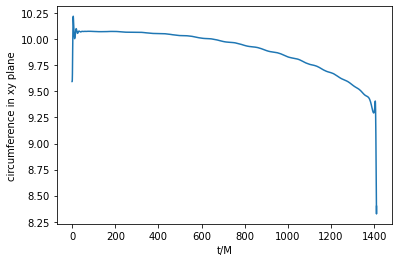

In [14]:
data = primary_compact_object.get_data_from_columns([CompactObject.Column.TIME, CompactObject.Column.XY_PLANE_CIRCUMFERENCE])
time = data[:, 0]
circumference = data[:, 1]
plt.plot(time, circumference)
plt.xlabel('t/M')
plt.ylabel('circumference in xy plane')
plt.show()

## Close the Coalescence object to close the associated h5 file

In [15]:
coalescence.close()